# Attendance of Medical Appointments.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

The aim of this project is to clean, explore and analyse the [*Medical No Shows*](https://www.kaggle.com/datasets/joniarroba/noshowappointments) dataset which contains 110,527 medical appointments and 14 associated variables.

For this project, I have posed the following questions that the analysis seeks to answer:
- What is the Age Distribution and how does it Affect Appointment Attendance?
- What is the Gender Distribution and how does it Affect Appointment Attendance?
- What is the Relationship between Neighbourhoods and Appointment Attendance?
- What is the Effect of SMS Reception on Appointment Attendance?
- Does Scholarship has an Effect on Appointment Attendance?
- What is the Effect of Waiting Period on Appointment Attendance?

In [1]:
# importing packages for use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv') #loading data from csv file


<a id='wrangling'></a>
## Data Wrangling


In [2]:
df.head() #checking first lines of the dataframe

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape #checking the dimension of the dataframe

(110527, 14)

The dimension of the dataframe are 110527 rows and 14 columns

In [4]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the information obtained, the dataframe has no missing values. The column names however, could use some renaming. The datatypes of the scheduled and appointment days also have to be changed from *string* to *datetime* for easier analysis. The datatype for Patient ID will also be changed from *float* to *string*. The Appointment ID is unnecessary and will be dropped. 

In [5]:
df['PatientId'].nunique(),df['PatientId'].duplicated().sum() #checking for duplicated Patient IDs

(62299, 48228)

Here, it is observed that the Patient ID column contains several duplicates. This may be as a result of patients rescheduling their appointments. The duplicates will be retained in the dataframe for analysis. 

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the statistics obtained, it is noted that:
- The average age of patients is *37* years.
- The minimum age is *-1* which is an anomaly and will have to be discarded during cleaning.
- Those under scholarship are *9.83%* of the patients.
- Patients with:
  - **Hypertension** were *19.7%* of the total number.
  - **Diabetes** were *7.2%* of the total number
  - **Alcoholism*** were *3%* of the total number
- **Disabled** patients made up *2.2%* of the total number.

In [7]:
print(df['ScheduledDay'].min(), df['ScheduledDay'].max())
print(df['AppointmentDay'].min(), df['AppointmentDay'].max())

2015-11-10T07:13:56Z 2016-06-08T20:07:23Z
2016-04-29T00:00:00Z 2016-06-08T00:00:00Z


It is observed that patients have been scheduling appointments for about *7* months while the appointment days provided are in a span of a little bit over a month.

### Data Cleaning 

In [8]:
df.drop(['AppointmentID'], axis =1, inplace = True)
df.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


The appointment ID column is removed from the dataframe as it will no longer be used.

In [9]:
name_dict = {'PatientId':'patient_id','ScheduledDay':'scheduled_day','AppointmentDay':'appointment_day',
              'Hipertension':'hypertension','Handcap':'disabled','No-show':'no_show'}
df.rename(columns = name_dict, inplace =True) #change column names to those in the dictionary
df.rename(columns = lambda x: x.lower(), inplace = True) #change all column names to lowercase

df.head(1)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,disabled,sms_received,no_show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


The column titles have been changed to lowercase and a few other column titles have typos and grammar fixed while some have an underscore added for better legibility.

In [10]:
df['patient_id'] = df['patient_id'].astype(str) #change the datatype of Patient ID column to string from float

In [11]:
df.shape #shows the new dimensions of the dataframe

(110527, 13)

In [12]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df['waiting_period'] = (df['appointment_day']- df['scheduled_day']).dt.days #waiting period is rounded to days
df.waiting_period.head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: waiting_period, dtype: int64

Firstly, the *schedule_day* and *appointment_day* columns have their datatypes converted from *string* to *datetime*. A new column *waiting_period* is then created to capture the time difference between when the patient first scheduled an appointment and the appointment day they were assigned.

In [13]:
df.drop(['scheduled_day','appointment_day'], axis=1, inplace=True)

The schedule and appointment days columns are removed from the dataframe as they will a nuisance during analysis.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   patient_id      110527 non-null  object
 1   gender          110527 non-null  object
 2   age             110527 non-null  int64 
 3   neighbourhood   110527 non-null  object
 4   scholarship     110527 non-null  int64 
 5   hypertension    110527 non-null  int64 
 6   diabetes        110527 non-null  int64 
 7   alcoholism      110527 non-null  int64 
 8   disabled        110527 non-null  int64 
 9   sms_received    110527 non-null  int64 
 10  no_show         110527 non-null  object
 11  waiting_period  110527 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 10.1+ MB


In [15]:
df = df.query('age > 0') #remove the anomaly where Age had been recorded as -1

<a id='eda'></a>
## Exploratory Data Analysis

Note: In the **no_show** column, **No** means that the patient attended the appointment and **Yes** means that the patient missed the appointment. 

In [16]:
df.describe() #Dataframe description after cleaning

,age,scholarship,hypertension,diabetes,alcoholism,disabled,sms_received,waiting_period
count,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264,9.166721
std,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725,15.263508
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000


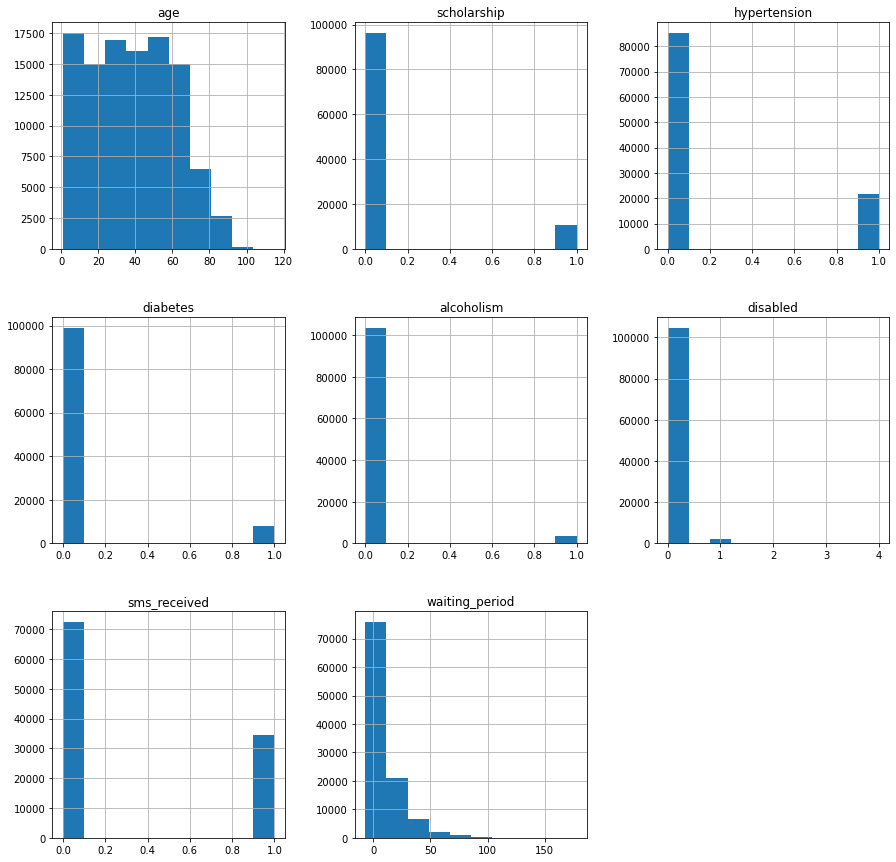

In [17]:
df.hist(figsize=(15,15));

From the histrogram, it is evident that:
- Most patients seeking an appointment are below the age of 60 years.
- Most patients were not enrolled in the scholarship programme.
- Most patients did not suffer from hypertension.
- Most patients did not suffer from diabetes.
- Most patients were not suffering from alcoholism.
- Most patients were not disabled.
- Most patients did not recieve an SMS regarding their appointment.

In [18]:
#Function for executing the relationship between attendance and gender,neighbourhood, scholarship and sms received
def eda_df(c1,c2, plot_type, sz):
    eda_df = df.groupby([c1,c2]).size()
    eda_df = eda_df.unstack()
    eda_df.plot(kind = plot_type, figsize = sz)
    return

#Function for Labelling xticks 
def xlbl(n1,n2):
    x = [0,1]
    cx = plt.subplot()
    cx.set_xticks(x)
    cx.set_xticklabels([n1,n2])
    return


### Research Question 1: What is the Age Distribution and how does it Affect Appointment Attendance?

In [19]:
print(sorted(df.age.unique())) #sorting the Ages of patients from the youngest to the oldest

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [20]:
#set up bins to show ranges of ages that will be analysed
bins = [1,15,24,35,60,130]
df['age_set'] = pd.cut(df.age, bins, include_lowest=True)
df.age_set.head()

0    (60.0, 130.0]
1     (35.0, 60.0]
2    (60.0, 130.0]
3    (0.999, 15.0]
4     (35.0, 60.0]
Name: age_set, dtype: category
Categories (5, interval[float64, right]): [(0.999, 15.0] < (15.0, 24.0] < (24.0, 35.0] < (35.0, 60.0] < (60.0, 130.0]]

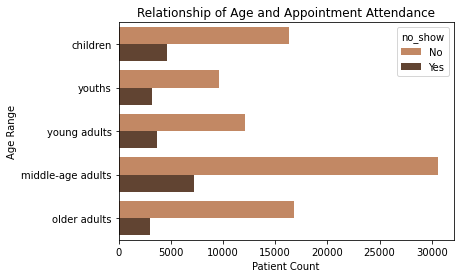

In [21]:
#Using Seaborn to plot
sns.countplot(y='age_set', hue='no_show', palette= "copper_r",
              data=df).set(title='Relationship of Age and Appointment Attendance',xlabel='Patient Count', ylabel='Age Range')
y = [0,1,2,3,4]
ay = plt.subplot()
ay.set_yticks(y)

ay.set_yticklabels(['children','youths','young adults','middle-age adults','older adults']);

The ages of the patients were first sorted in order to establish the appropriate age ranges for use in the analysis. The ages were then grouped as:
- Children: 1 - 15 years
- Youths: 15 - 24 years
- Young Adults: 24 - 35 years
- Middle-age Adults: 35 - 60 years
- Older Adults: 60+ years

From the countplot, it is observed that there were generally more middle-age adults and their appointment attendance and absence was more than that of other age ranges. The older adults and youths had the least number of patients who missed their appointments. 

### Research Question 2: What is the Gender Distribution and how does it Affect Appointment Attendance?

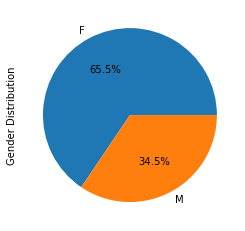

In [22]:
#plot a pie chart to show gender distribution
df.groupby('gender').size().plot(kind='pie', autopct='%.1f%%', ylabel = 'Gender Distribution'); 


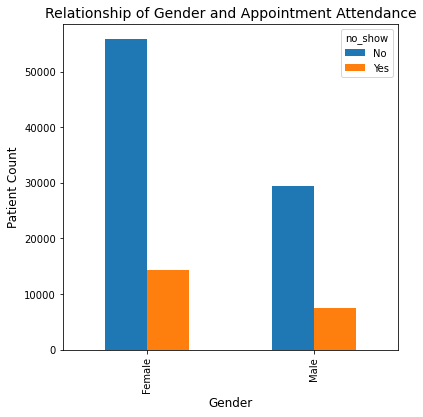

In [23]:
#plot a bar chart to show realtionship between gender and attendance
eda_df('gender','no_show','bar',(6,6))

xlbl('Female','Male')

plt.title('Relationship of Gender and Appointment Attendance', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Patient Count', fontsize=12);

From the Pie Chart, it is seen that there were more female (*65.5%*) than male (*34.5%*) patients who scheduled for appointments.

From the barchart, it is noted that there were still more female patients who attended their appointments when compared to male patients.

### Research Question 3: What is the Relationship between Neighbourhoods and Appointment Attendance?

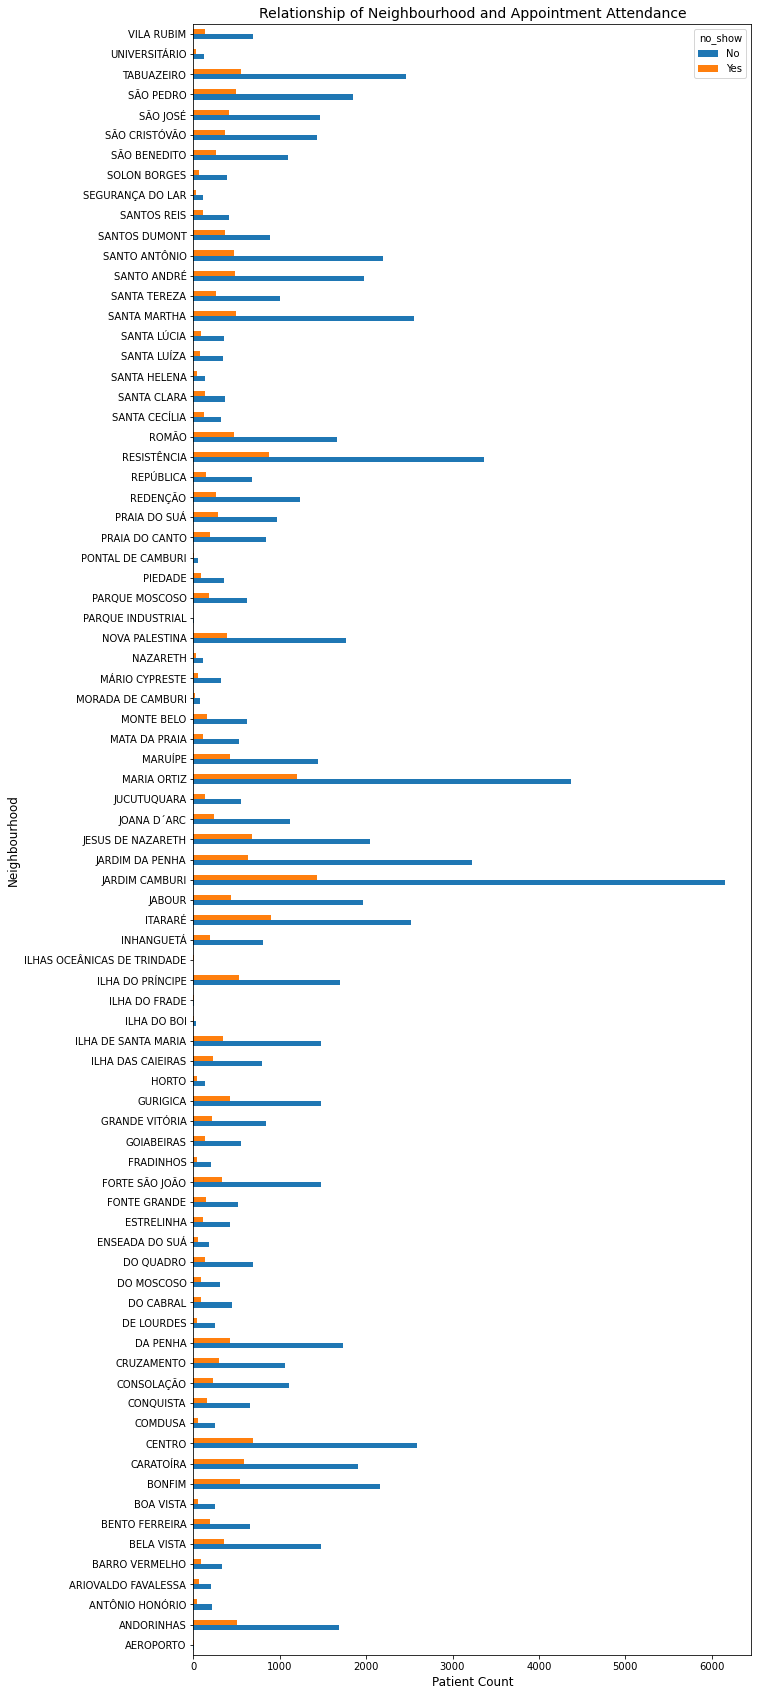

In [24]:
#plot a bar chart to show relationship between neighbourhoods and attendance
eda_df('neighbourhood','no_show','barh',(10,30))

plt.title('Relationship of Neighbourhood and Appointment Attendance', fontsize=14)
plt.xlabel('Patient Count', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12);

The bar chart above shows the number of patients in each neighbourhood and whether or not they attend the appointments.

From the plot, it is noted that in each neighborhood there were more patients turning up for their appointments.

### Research Question 4: What is the Effect of SMS Reception on Appointment Attendance?

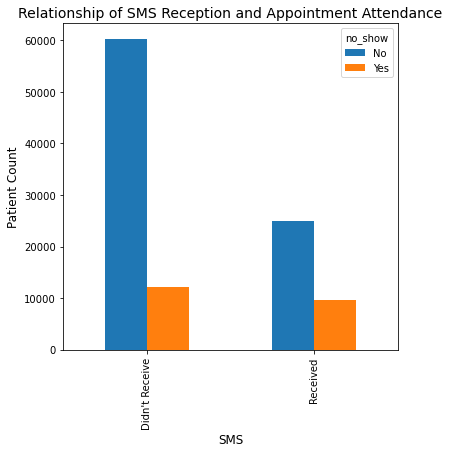

In [25]:
#plot a bar chart to show relationship between receiving SMS and attendance
eda_df('sms_received','no_show','bar',(6,6))

xlbl("Didn't Receive","Received")

plt.xlabel('SMS', fontsize=12)
plt.ylabel('Patient Count', fontsize=12)
plt.title('Relationship of SMS Reception and Appointment Attendance', fontsize=14);


From the plot, it is observed that reception of SMS was insignificant when it came to appointment attendance. The number of patients who did not receive an SMS and still managed to show up for their appointments was overwhelmingly more.

### Research Question 5:  Does Scholarship has an Effect on Appointment Attendance?

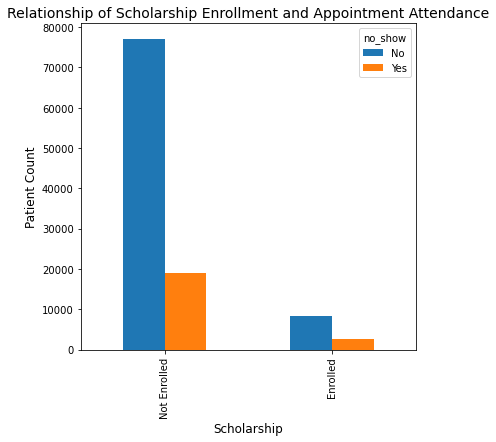

In [26]:
#plot a bar chart to show realtionship between scholarship enrollment and attendance
eda_df('scholarship','no_show','bar',(6,6))

xlbl('Not Enrolled','Enrolled')

plt.title('Relationship of Scholarship Enrollment and Appointment Attendance', fontsize=14)
plt.xlabel('Scholarship', fontsize=12)
plt.ylabel('Patient Count', fontsize=12);

From the plot, it is noted that scholarship played a minor role when it came to attendance of appointments. There were far more patients who were not enrolled in the scholarship and still scheduled and attended their appointments.

### Research Question 6: What is the Effect of Waiting Period on Appointment Attendance?

In [27]:
print(sorted(df.waiting_period.unique())) #sorting the waiting periods from the shortest to the longest

[-7, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 114, 116, 118, 121, 122, 124, 125, 126, 131, 132, 138, 141, 145, 150, 154, 161, 168, 175, 178]


In [28]:
df = df.query('waiting_period > 0') #limit waiting period for analysis to a day or more

In [29]:
#set up bins to show ranges of waiting periods that will be analysed
bins = [1,7,14,30,90,180]
df['time_frame'] = pd.cut(df.waiting_period, bins, include_lowest=True)
df.time_frame.head()

5     (0.999, 7.0]
6     (0.999, 7.0]
7     (0.999, 7.0]
9     (0.999, 7.0]
10    (0.999, 7.0]
Name: time_frame, dtype: category
Categories (5, interval[float64, right]): [(0.999, 7.0] < (7.0, 14.0] < (14.0, 30.0] < (30.0, 90.0] < (90.0, 180.0]]

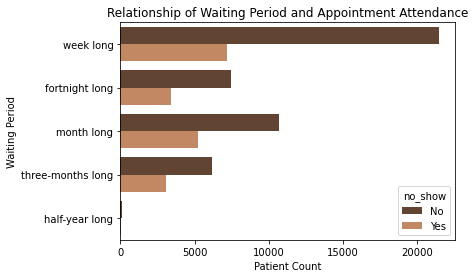

In [30]:
#Using Seaborn to plot
sns.countplot(y='time_frame', hue='no_show', palette= "copper",
              data=df).set(title='Relationship of Waiting Period and Appointment Attendance', xlabel='Patient Count', ylabel='Waiting Period');
y = [0,1,2,3,4]
fy = plt.subplot()
fy.set_yticks(y)

fy.set_yticklabels(['week long','fortnight long','month long','three-months long','half-year long']);

The waiting periods for the patients were sorted in order to establish the ranges for use in the analysis. The periods were then grouped as:
- Week long: 1 - 7 days
- Fortnight long: 7 - 14 days
- Month long: 14 - 30 days
- Three months long: 30 - 90 days
- half_year long: 90 - 180 days

From the count plot, it is observed that more patients attended their appointments when the waiting period was within a week. For the half-year long period, there very few patients who showed up for their appointments.

<a id='conclusions'></a>
## Conclusions

From the analysis conducted, it is concluded that:
- There were more female than male patients and this was reflected in their attendance.
- Most patients favoured week-long waiting periods.
- Most patients were middle-age adults and this was reflected in the attendance.
- Older patients showed up for their appointments more.
- Neighbourhoods were not a major factor in attendance since most patients in all neighbourhoods showed up for their appointments.
- Scholarship and receiving SMS were of little significance for patients scheduling and attending their appointments.

However, my analysis was limited by the choice I had to make of either dropping or retaining the duplicated patient IDs. This means that the analysis may not have been as accurate as possible since I chose the focus to be on the appointments scheduled and their attendance rather than the uniqueness of patients. 


<a id='references'></a>
## References

- https://pandas.pydata.org/pandas-docs/stable/reference/index.html
- https://matplotlib.org/stable/api/pyplot_summary.html
- https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot
- https://www.statology.org/python-guides/
- https://www.geeksforgeeks.org/python-seaborn-tutorial/?ref=lbp
- https://www.geeksforgeeks.org/matplotlib-tutorial/?ref=lbp